In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

In [117]:
## Loading the dataset
gender_data = pd.read_csv('gender_submission.csv')
test_titanic = pd.read_csv("test.csv")
train_titanic = pd.read_csv("train.csv")

In [118]:
## Exploring the dataset by viewing various characteristics about it
train_titanic.info()
train_titanic.shape
train_titanic.columns
train_titanic.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
test_titanic.info()
test_titanic.shape
test_titanic.columns
test_titanic.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [122]:
test_titanic.insert(1, 'Survived', gender_data['Survived'])

In [124]:
##data cleaning 



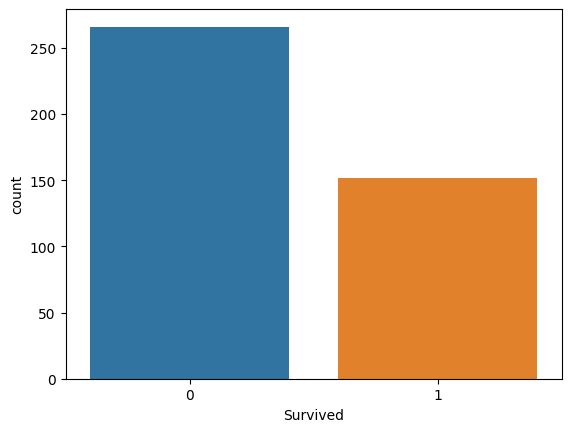

In [125]:
## Using a countplot to view the passengers who survived vs those who didn't
sns.countplot(x= 'Survived', data= test_titanic)
plt.show()

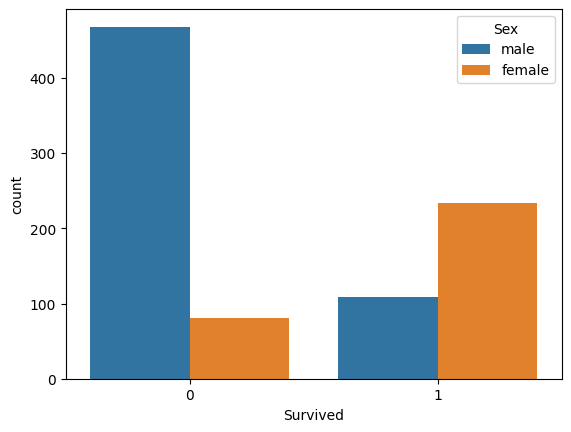

In [126]:
## Using a countplot to view the passengers who survived vs those who didn't while also viewing their Sex
sns.countplot(x= 'Survived', data= train_titanic, hue='Sex')
plt.show()

<Axes: >

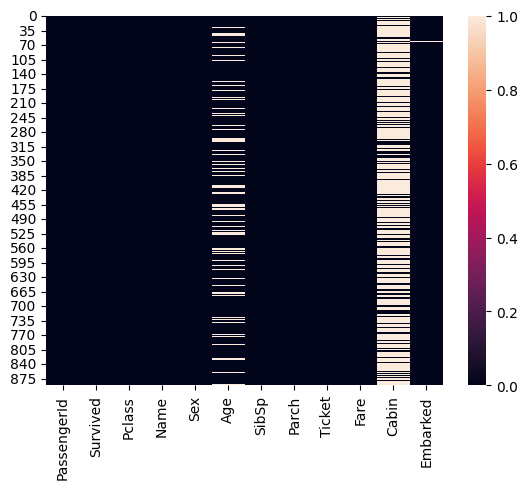

In [127]:
## Checking for null values
sns.heatmap(train_titanic.isna())


In [128]:
## finding the percentage of null values in age
test_titanic['Age'].isna().value_counts()/len(test_titanic['Age'])*100

Age
False    79.425837
True     20.574163
Name: count, dtype: float64

In [129]:
## finding the percentage of null values in cabin
test_titanic['Cabin'].isna().value_counts()/len(test_titanic['Cabin'])*100

Cabin
True     78.229665
False    21.770335
Name: count, dtype: float64

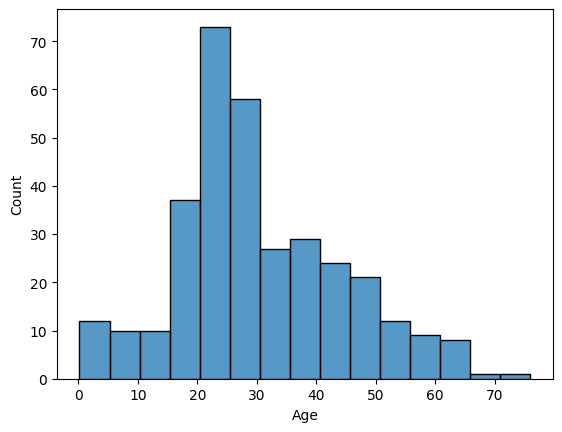

In [130]:
## finding the distribution of the age column using a histogram
sns.histplot(x = 'Age', data = test_titanic)
plt.show()

In [131]:
## Filling up null values with the average of the column
##test_titanic_data =  test_titanic['Age'].mean()

test_titanic['Age'].fillna(test_titanic['Age'].mean(), inplace=True)

In [132]:
test_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

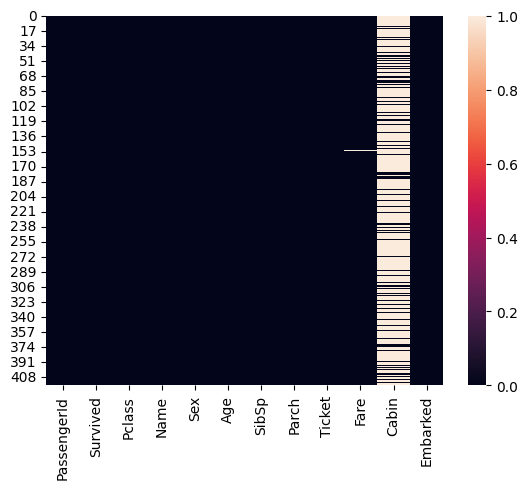

In [133]:
sns.heatmap(data = test_titanic.isna())

In [134]:
test_titanic.drop('Cabin', axis =1, inplace=True)


In [143]:
test_titanic.dropna(inplace=True)

In [144]:
test_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [159]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [146]:

gender = pd.get_dummies(test_titanic['Sex'], drop_first=True)


In [147]:
test_titanic['Gender'] = gender

In [148]:
test_titanic['Gender'] = test_titanic['Gender'].astype(int)

In [149]:
test_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [150]:
## Dropping all categorical features
test_titanic.drop(['Name','Sex','Ticket','Embarked'], axis=1, inplace=True)

In [151]:
test_titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,0,3,34.5,0,0,7.8292,1
1,893,1,3,47.0,1,0,7.0000,0
2,894,0,2,62.0,0,0,9.6875,1
3,895,0,3,27.0,0,0,8.6625,1
4,896,1,3,22.0,1,1,12.2875,0


In [152]:
## Separating dependent and independent variables

X = test_titanic[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y = test_titanic['Survived']

In [171]:
## Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [172]:
## Creating a logistic regression object
log_r = LogisticRegression()

In [173]:
## Fitting the model with the data
log_r.fit(X_train, y_train)

c:\Users\argli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [174]:
## Doing a prediction
prediction = log_r.predict(X_test)

In [175]:
## Model Evaluation

## Constructing and printing a confusion matrix

confusion_matrix(y_test,prediction)

array([[40,  0],
       [ 0, 23]], dtype=int64)

In [176]:
## Turning the confusion matrix to dataframe
## It appears the model is overfitting
pd.DataFrame(confusion_matrix(y_test,prediction), columns=['Predicted No','Predicted Yes'], index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,40,0
Actual Yes,0,23


In [177]:
## It appears the model is overfitting
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        23

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

